In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.stores.mysql import Mysql
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [2]:
ticker = 'GE'

mysql = Mysql()

In [3]:
mysql.update_candles(ticker, 60)

,t,o,l,h,c,v,r
t,,,,,,,
0,2020-03-26 20:00:00,8.05,8.220,8.1700,8.050,0.000000,17256420
1,2020-03-26 23:00:00,8.13,8.170,8.1500,8.150,-0.006083,58154
0,2020-03-27 08:00:00,7.98,8.110,8.0300,8.110,0.000000,5229
1,2020-03-27 11:00:00,7.82,8.000,7.8500,7.920,-0.013563,129058
2,2020-03-27 12:00:00,7.69,7.890,7.8200,7.850,-0.013750,578723
...,...,...,...,...,...,...,...
3,2021-03-26 15:00:00,12.87,12.950,12.9290,12.905,-0.009939,2865901
4,2021-03-26 16:00:00,12.87,12.990,12.9500,12.910,0.003089,3526833
5,2021-03-26 17:00:00,12.79,12.990,12.8550,12.950,0.000000,5050306


In [4]:
data = mysql.get_closes_by_symbol(ticker)

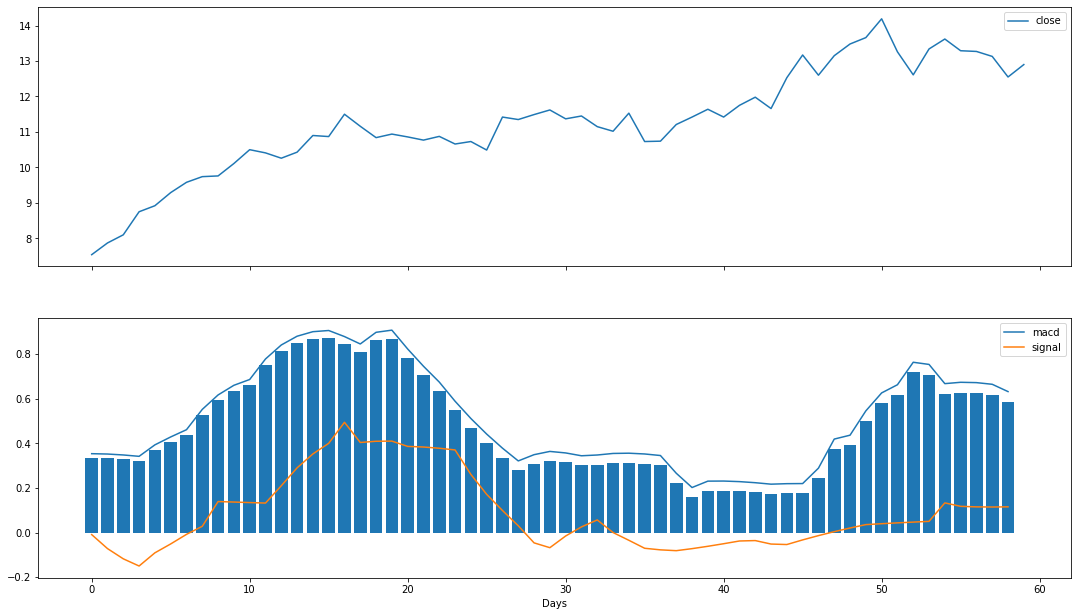

In [5]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

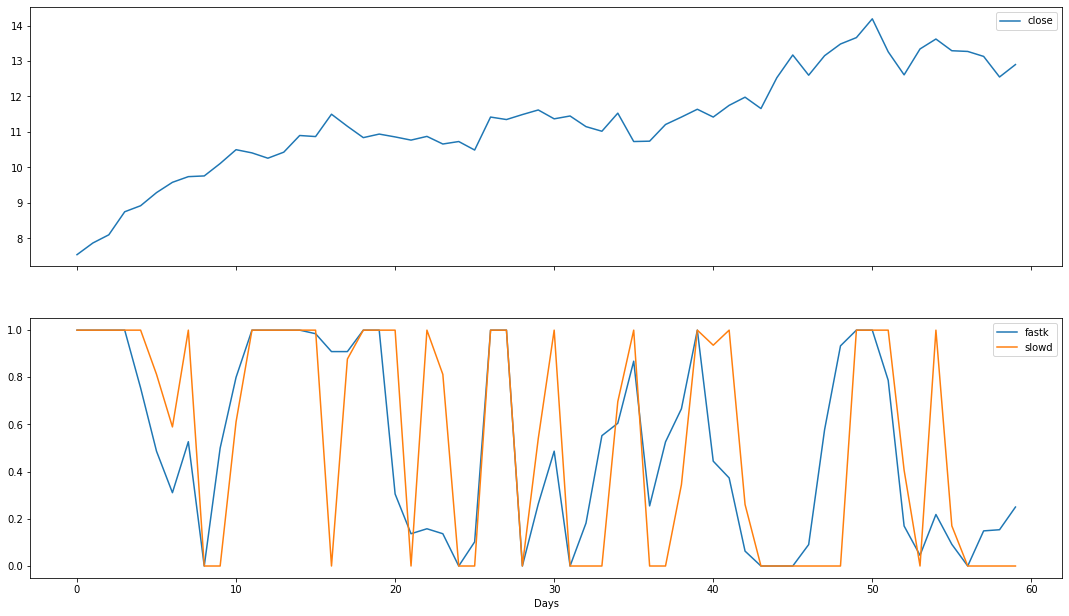

In [6]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)